In [43]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import torch
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons
from torchmetrics.classification import BinaryAccuracy

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

### device agnostic code

In [44]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

### creating data

In [45]:
X, y = make_moons(n_samples=1000, noise=0.03, random_state=42, shuffle=True)
X[:10],X.shape,y.shape,y[:10]

(array([[-0.00933187,  0.39098105],
        [ 0.95457387, -0.47375583],
        [ 0.9185256 , -0.42519648],
        [ 0.41276802, -0.37638459],
        [-0.84532016,  0.52879908],
        [ 0.57954249, -0.35297867],
        [ 0.29488426, -0.20923768],
        [-0.01448804,  0.4358961 ],
        [ 1.62651037, -0.28120742],
        [ 0.67159767,  0.78642227]]),
 (1000, 2),
 (1000,),
 array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0]))

### tensor ma lageko

In [46]:
X_moon, y_moon = torch.from_numpy(X).type(torch.float32), torch.from_numpy(y).type(torch.float32)
X_moon[:5],y_moon[:5]

(tensor([[-0.0093,  0.3910],
         [ 0.9546, -0.4738],
         [ 0.9185, -0.4252],
         [ 0.4128, -0.3764],
         [-0.8453,  0.5288]]),
 tensor([1., 1., 1., 1., 0.]))

### train test split

In [47]:
X_moon_train, X_moon_test , y_moon_train ,y_moon_test = train_test_split(X_moon, y_moon, test_size=0.2, random_state=42)

In [48]:
X_moon_train.shape, y_moon_train.shape , X_moon_test.shape ,y_moon_test.shape

(torch.Size([800, 2]),
 torch.Size([800]),
 torch.Size([200, 2]),
 torch.Size([200]))

### plot data

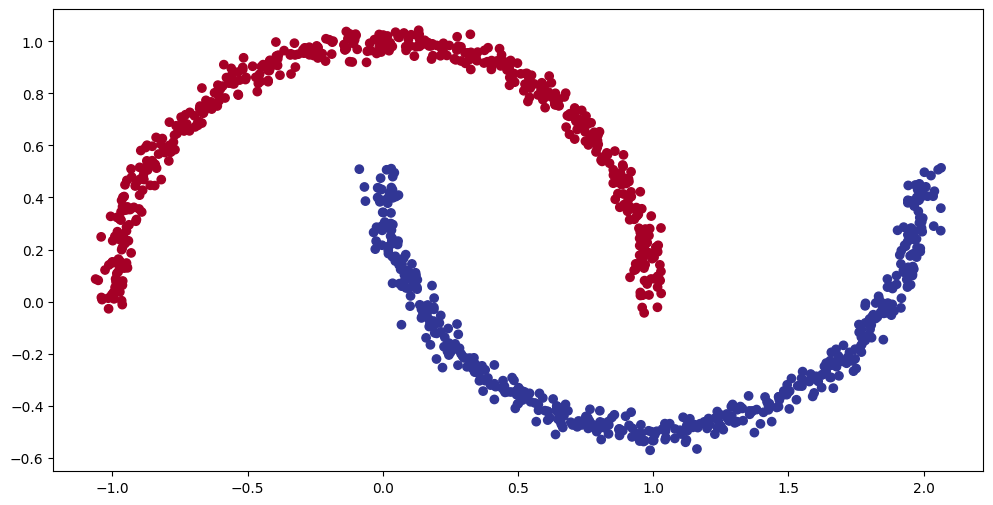

In [49]:
plt.figure(figsize=(12,6))
plt.scatter(X_moon[:,0],X_moon[:,1],c=y_moon,cmap=plt.cm.RdYlBu)

### Build a model by subclassing 

In [50]:
from torch import nn

class MoonModel(nn.Module):
    def __init__(self,input_features,output_features,hidden_units=10):
        super().__init__()
        self.hamro_layers = nn.Sequential(nn.Linear(in_features=input_features , out_features=hidden_units ),
                                          nn.ReLU(),
                                         nn.Linear(in_features=hidden_units , out_features=hidden_units ),
                                          nn.ReLU(),
                                          nn.Linear(in_features=hidden_units , out_features=hidden_units ),
                                          nn.ReLU(),
                                          nn.Linear(in_features=hidden_units , out_features=hidden_units ),
                                          nn.ReLU(),
                                          nn.Linear(in_features=hidden_units , out_features=hidden_units ),
                                          nn.ReLU(),
                                          nn.Linear(in_features=hidden_units , out_features=output_features ),
                                         ) #6 linear layers
        
    def forward(self,x):
        return self.hamro_layers(x)

# creating an instance of the MoonModel and sending in to the target device
model = MoonModel(input_features=2,output_features=1,hidden_units=10).to(device)
model

MoonModel(
  (hamro_layers): Sequential(
    (0): Linear(in_features=2, out_features=10, bias=True)
    (1): ReLU()
    (2): Linear(in_features=10, out_features=10, bias=True)
    (3): ReLU()
    (4): Linear(in_features=10, out_features=10, bias=True)
    (5): ReLU()
    (6): Linear(in_features=10, out_features=10, bias=True)
    (7): ReLU()
    (8): Linear(in_features=10, out_features=10, bias=True)
    (9): ReLU()
    (10): Linear(in_features=10, out_features=1, bias=True)
  )
)

In [51]:
model.state_dict()

OrderedDict([('hamro_layers.0.weight',
              tensor([[-0.4021, -0.5401],
                      [ 0.1533, -0.0926],
                      [-0.6269,  0.4246],
                      [-0.4806,  0.2893],
                      [-0.2895, -0.5437],
                      [ 0.3183, -0.2507],
                      [-0.2806, -0.1253],
                      [ 0.5171,  0.2054],
                      [-0.5263,  0.5500],
                      [ 0.3219, -0.3197]])),
             ('hamro_layers.0.bias',
              tensor([-0.6729, -0.1929,  0.2852,  0.0984,  0.2252, -0.5598,  0.0980, -0.2106,
                       0.0983,  0.6978])),
             ('hamro_layers.2.weight',
              tensor([[-0.0018,  0.0091,  0.2872, -0.2647,  0.1254, -0.1587, -0.3149, -0.1584,
                        0.1296,  0.2797],
                      [ 0.1054,  0.1425,  0.1527, -0.2475,  0.0355, -0.1614,  0.2706,  0.0524,
                        0.1328,  0.1982],
                      [ 0.2547, -0.2508,  0.2116,  

In [52]:
X_moon_train.shape,y_moon_train.shape

(torch.Size([800, 2]), torch.Size([800]))

In [53]:
#make predictions
with torch.inference_mode():
    untrained_preds = model(X_moon_test.to(device))
print(f"Length of predictions {len(untrained_preds)}, Shape: {untrained_preds.shape}")
print(f"Length of test samples: {len(X_moon_test)}, Shape: {X_moon_test.shape}")
print(f"\n First 10 predictions:\n{untrained_preds[:10]}")
print(f"\n First 10 labels:\n{y_moon_test[:10]}")

Length of predictions 200, Shape: torch.Size([200, 1])
Length of test samples: 200, Shape: torch.Size([200, 2])

 First 10 predictions:
tensor([[-0.1085],
        [-0.1061],
        [-0.1104],
        [-0.1044],
        [-0.1101],
        [-0.1104],
        [-0.1083],
        [-0.1087],
        [-0.1104],
        [-0.1059]])

 First 10 labels:
tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


### loss and optimizer setup

In [54]:
loss_fn = nn.BCEWithLogitsLoss()

optimizer = torch.optim.SGD(params=model.parameters(),
                           lr=0.1) 

### accuracy function

In [55]:
accuracy_fn = BinaryAccuracy()

## train the model
### training and testing loop

In [56]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs = 1000

X_moon_train = X_moon_train.to(device)
y_moon_train = y_moon_train.to(device)
X_moon_test = X_moon_test.to(device)
y_moon_test = y_moon_test.to(device)


for epoch in range(epochs):
    #training
    model.train()
    
    #1 frwd pass
    y_logits = model(X_moon_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits)) #logits -> pred probs -> pred labels
    
    #2 calc the loss and accuracy
    loss = loss_fn(y_logits,y_moon_train)
    acc = accuracy_fn(y_pred,y_moon_train)
    
    #3 optimizer zero grad
    optimizer.zero_grad()
    
    #4 loss backwards 
    loss.backward()
    
    #5 optimizer step
    optimizer.step()
    
    ### testing
    model.eval()
    with torch.inference_mode():
        test_logits = model(X_moon_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))
        
        #loss and accuracy
        test_loss = loss_fn(test_logits,y_moon_test)
        test_acc = accuracy_fn(test_pred,y_moon_test)
        
    # printing what is happening in every 10 epochs:
    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")
         

Epoch: 0 | Loss: 0.69662, Accuracy: 0.50% | Test loss: 0.69624, Test acc: 0.50%
Epoch: 100 | Loss: 0.69061, Accuracy: 0.50% | Test loss: 0.69088, Test acc: 0.50%
Epoch: 200 | Loss: 0.67714, Accuracy: 0.78% | Test loss: 0.67865, Test acc: 0.77%
Epoch: 300 | Loss: 0.33028, Accuracy: 0.83% | Test loss: 0.34645, Test acc: 0.85%
Epoch: 400 | Loss: 0.16763, Accuracy: 0.92% | Test loss: 0.16177, Test acc: 0.93%
Epoch: 500 | Loss: 0.01836, Accuracy: 1.00% | Test loss: 0.01691, Test acc: 1.00%
Epoch: 600 | Loss: 0.00453, Accuracy: 1.00% | Test loss: 0.00418, Test acc: 1.00%
Epoch: 700 | Loss: 0.00225, Accuracy: 1.00% | Test loss: 0.00207, Test acc: 1.00%
Epoch: 800 | Loss: 0.00142, Accuracy: 1.00% | Test loss: 0.00129, Test acc: 1.00%
Epoch: 900 | Loss: 0.00101, Accuracy: 1.00% | Test loss: 0.00091, Test acc: 1.00%


## to plot importing functions

In [57]:
!rm helper_function.py

rm: cannot remove 'helper_function.py': No such file or directory


In [58]:
import requests
from pathlib import Path

# Download helper function from the learn PyTorch repo (if it's not already downloaded)
if Path('helper_functions.py').is_file():
    print('helper_functions.py exists, skipping download')
else:
    print('Downloading helper_functions.py')
    request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
    with open("helper_functions.py", "wb") as f:
        f.write(request.content)
        
from helper_functions import plot_predictions, plot_decision_boundary

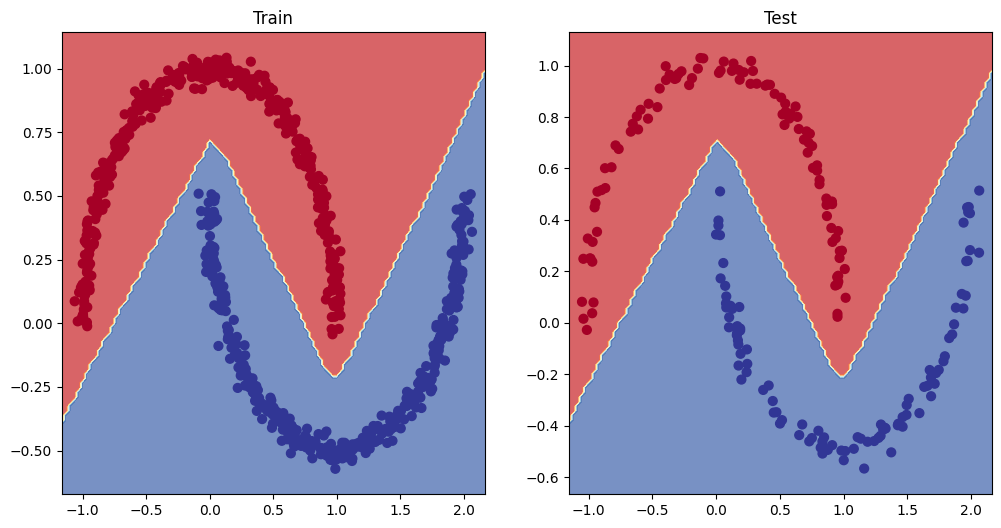

In [59]:
#plot decision boundary of the model

plt.figure(figsize=(12,6))
plt.subplot(1,2,1) #rows, column, and index of the current plot
plt.title('Train')
plot_decision_boundary(model,X_moon_train,y_moon_train)
plt.subplot(1,2,2) #rows, column, and index of the current plot
plt.title('Test')
plot_decision_boundary(model,X_moon_test,y_moon_test)

In [64]:
model.eval()
with torch.inference_mode():
        testing_logits = model(X_moon_test).squeeze()
        y_preds = torch.round(torch.sigmoid(test_logits))

y_preds[:10],y_moon_test[:10]

(tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.]),
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.]))